### Download data

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1OqlrbloFQlPw893K4DHkP2UwG8FjgmBf' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1OqlrbloFQlPw893K4DHkP2UwG8FjgmBf" -O data.zip && rm -rf /tmp/cookies.txt

--2023-07-28 13:58:13--  https://docs.google.com/uc?export=download&confirm=t&id=1OqlrbloFQlPw893K4DHkP2UwG8FjgmBf
Resolving docs.google.com (docs.google.com)... 74.125.197.139, 74.125.197.101, 74.125.197.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.197.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n300fms5o4k1c56e2lr9gsf0eef0gmnq/1690552650000/08719684158669863987/*/1OqlrbloFQlPw893K4DHkP2UwG8FjgmBf?e=download&uuid=1dcc6132-cf82-45dd-ae46-0fb22a98766b [following]
--2023-07-28 13:58:13--  https://doc-00-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n300fms5o4k1c56e2lr9gsf0eef0gmnq/1690552650000/08719684158669863987/*/1OqlrbloFQlPw893K4DHkP2UwG8FjgmBf?e=download&uuid=1dcc6132-cf82-45dd-ae46-0fb22a98766b
Resolving doc-00-14-docs.googleusercontent.com (doc-00-14-docs.googleusercontent.com)... 74.125.197.132, 

In [3]:
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/large_tif/
  inflating: data/large_tif/attunet.tif  
  inflating: data/large_tif/ghsl.tif  
  inflating: data/large_tif/resunet.tif  
  inflating: data/large_tif/true.tif  
  inflating: data/large_tif/unet.tif  
   creating: data/small_tif/
  inflating: data/small_tif/attunet.tif  
  inflating: data/small_tif/ghsl.tif  
  inflating: data/small_tif/resunet.tif  
  inflating: data/small_tif/true.tif  
  inflating: data/small_tif/unet.tif  


## Start plotting

In [4]:
from osgeo import gdal
##### SLOW PROCESSING (uncomment if needed) ######
# x1 = gdal.Open("/data/large_tif/true.tif").ReadAsArray() # do not change
# y1 = gdal.Open("/data/large_tif/ghsl.tif").ReadAsArray() # change to ghsl.tif; unet.tif; resunet.tif; attunet.tif

##### FAST PROCESSING (uncomment if needed) ######
x1 = gdal.Open("/data/small_tif/true.tif").ReadAsArray() # do not change
y1 = gdal.Open("/data/small_tif/ghsl.tif").ReadAsArray() # change to ghsl.tif; unet.tif; resunet.tif; attunet.tif

print(x1.shape, y1.shape)

(512, 512) (512, 512)


In [5]:
##### Test for nan values in array #####
import numpy as np
print(np.count_nonzero(np.isnan(x1)))
print(np.count_nonzero(np.isnan(y1)))

0
0


In [ ]:
##### see values in array #####
print(np.unique(y1))

In [ ]:
# ##### IF nan VALUE UNCOMMENT ACCORDINGLY #####
# y1 = np.nan_to_num(y1, 0)
# ##### code to replace all negative value with 0 #####
# y1[y1<0] = 0

In [6]:
x = x1.flatten()
y = y1.flatten()
print(x.shape, y.shape)

In [9]:
# USE conda install -c conda-forge mpl-scatter-density else use :
# !pip install mpl_scatter_density

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.5/655.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 4.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/usr/local/lib/python3.10/dist-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


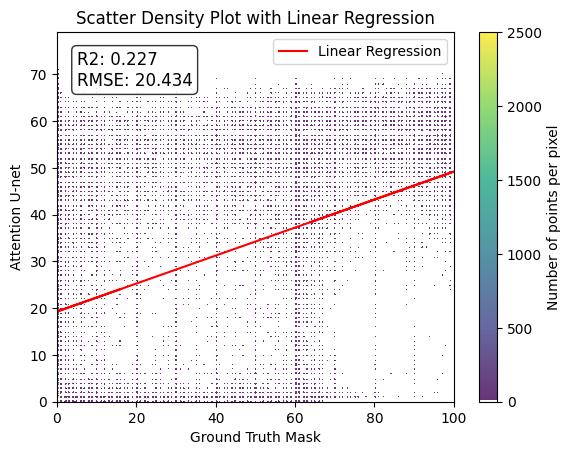

In [10]:
import matplotlib.pyplot as plt
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)


def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis, vmin=0, vmax=2500, alpha=0.8)
    fig.colorbar(density, label='Number of points per pixel')

# Fit a linear curve and estimate its y-values
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b

# Calculate R-squared (R2) and Root Mean Squared Error (RMSE)
y_mean = np.mean(y)
r2 = 1 - np.sum((y - y_est) ** 2) / np.sum((y - y_mean) ** 2)
rmse = np.sqrt(np.mean((y - y_est) ** 2))

fig = plt.figure()
using_mpl_scatter_density(fig, x, y)
# using_mpl_scatter_density(fig, x, y, y_error)

# Plot the linear regression line
ax = fig.gca()
ax.plot(x, y_est, '-', color='red', label='Linear Regression')

# Add R-squared (R2) and RMSE as text in the plot with a colored background
text_str = f'R2: {r2:.3f}\nRMSE: {rmse:.3f}'
ax.text(0.05, 0.95, text_str, transform=ax.transAxes, fontsize=12, va='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.xlabel('Ground Truth Mask')
plt.ylabel('Attention U-net')
plt.title('Scatter Density Plot with Linear Regression')
plt.legend()
plt.show()
